# Programming Assignment 2 
Claas Fillies

## Task 1: Non-linear Regression and Classication
### Subtask 1: Toy Data Regression

Import Data

<function matplotlib.pyplot.show(close=None, block=None)>

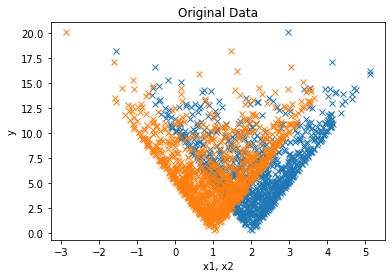

In [1]:
import h5py
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import sklearn
import sklearn.datasets 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import numpy as np
from numpy import linalg as LA
%matplotlib inline

hf = h5py.File("toy-regression.h5", "r")
x_train = np.array(hf.get("x_train"))
y_train = np.array(hf.get("y_train"))
x_test = np.array(hf.get("x_test"))
y_test = np.array(hf.get("y_test"))
hf.close()



#fig = plt.figure()
#ax = fig.add_subplot(111, projection="3d")
#ax.scatter3D(x_train[:,0], x_train[:,1], y_train)
#ax.scatter3D(x_test[:,0], x_test[:,1], y_test)


plt.plot(x_train[:,1], y_train,  "x")
plt.plot(x_train[:,0], y_train,  "x")
plt.title('Original Data')
plt.xlabel('x1, x2')
plt.ylabel('y')
plt.show

Creating an transformer that preprocesses the Data

In [2]:
class addNorm(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y = None):
        return self    
    def transform(self, X, y = None):
        newX = []
        for i in range(X.shape[0]): 
            newX.append(LA.norm([X[i,0] - 1, X[i,1]-2]))
        res = np.array(newX)
        out = res.reshape(len(res), 1)
        return out

Importing the Data and defining the two pipelines. <br>
preprocessPipe: <br>
- prepares the Data for the linear regression
linRegPipe:
- performs the linear regression

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

hf = h5py.File("toy-regression.h5", "r")
x_train = np.array(hf.get("x_train"))
y_train = np.array(hf.get("y_train"))
x_test = np.array(hf.get("x_test"))
y_test = np.array(hf.get("y_test"))
hf.close()

preprocessPipe = pipe  =  make_pipeline(
    (SimpleImputer(strategy='median')),
    (addNorm()),
)

linRegPipe  =  make_pipeline(
    LinearRegression(),
)


Data after preproccesing

<function matplotlib.pyplot.show(close=None, block=None)>

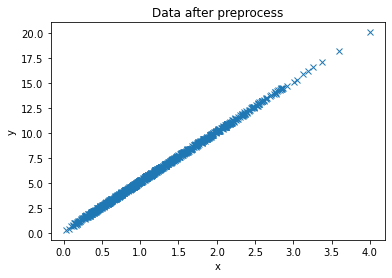

In [4]:
x_trans = preprocessPipe.fit_transform(x_train, y_train)
plt.plot(x_trans, y_train,  "x")
plt.title('Data after preprocess')
plt.xlabel('x')
plt.ylabel('y')
plt.show

In [5]:
linRegPipe.fit(x_trans, y_train)   #perform linear Fit

Pipeline(steps=[('linearregression', LinearRegression())])

Train mse: 0.007285996099515932


<function matplotlib.pyplot.show(close=None, block=None)>

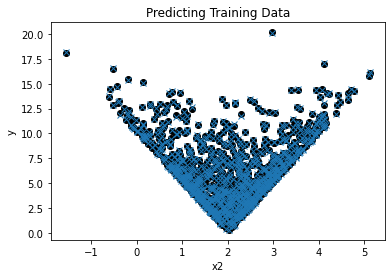

In [6]:
target_predicted = linRegPipe.predict(x_trans)
mse = mean_squared_error(y_train, target_predicted)
print("Train mse: " + str(mse))
plt.plot(x_train[:,1], y_train,  "x")
plt.scatter(x_train[:,1], target_predicted,color='k')
plt.title('Predicting Training Data')
plt.xlabel('x2')
plt.ylabel('y')
plt.show

Preprocessing x_train (without any knowledge of y_train) and predicting the y values with the model from the training data set.

Test mse: 0.007434179873613062


<function matplotlib.pyplot.show(close=None, block=None)>

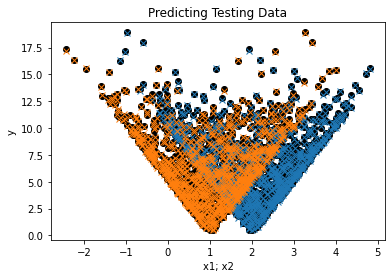

In [7]:
x_test_trans = preprocessPipe.fit_transform(x_test)
target_predicted = linRegPipe.predict(x_test_trans)
mse = mean_squared_error(y_test, target_predicted)
print("Test mse: " + str(mse))
plt.plot(x_test[:,1], y_test,  "x")
plt.scatter(x_test[:,1], target_predicted,color='k')
plt.plot(x_test[:,0], y_test,  "x")
plt.scatter(x_test[:,0], target_predicted,color='k')
plt.title('Predicting Testing Data')
plt.xlabel('x1; x2')
plt.ylabel('y')
plt.show

Polynominal Features

In [8]:
for i in range(15):
    print("--- (n: " + str(i +1) + ")---")
    polynomial_regression = make_pipeline(
        PolynomialFeatures(degree=i+1, include_bias=True),
        LinearRegression(),
    )
    polynomial_regression.fit(x_train, y_train)
    target_predicted = polynomial_regression.predict(x_train)
    mse = mean_squared_error(y_train, target_predicted)
    print("Train mse: " + str(mse))
    target_predicted_test = polynomial_regression.predict(x_test)
    mse_test = mean_squared_error(y_test, target_predicted_test)
    print("Test mse: " + str(mse_test))
 

--- (n: 1)---
Train mse: 10.78888692504013
Test mse: 9.971088497637169
--- (n: 2)---
Train mse: 0.8238834458853964
Test mse: 0.7897625204810549
--- (n: 3)---
Train mse: 0.7956102525838331
Test mse: 0.7977557548397667
--- (n: 4)---
Train mse: 0.23101317561486143
Test mse: 0.2470380645891812
--- (n: 5)---
Train mse: 0.1990470900712939
Test mse: 0.23103840237408022
--- (n: 6)---
Train mse: 0.0793035957027284
Test mse: 0.17460195407948204
--- (n: 7)---
Train mse: 0.08672820598344787
Test mse: 0.6242081813773658
--- (n: 8)---
Train mse: 0.03205490927326444
Test mse: 0.3741584640295896
--- (n: 9)---
Train mse: 0.029168631269239364
Test mse: 0.8924381169062865
--- (n: 10)---
Train mse: 0.018369838886844854
Test mse: 5.804066429748655
--- (n: 11)---
Train mse: 0.017063161213158543
Test mse: 13.48756003581625
--- (n: 12)---
Train mse: 0.012790140155864485
Test mse: 116.97308933482343
--- (n: 13)---
Train mse: 0.012982780817319154
Test mse: 644.6518288497145
--- (n: 14)---
Train mse: 0.011495127

The best Performance is achieved with a polynomial of the degree 6. <br>
Train mse: 0.0793035957027284 <br>
Test mse: 0.17460195407948204

## Subtask 2: Toy Data Classifcation

In [9]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

hf = h5py.File("toy-classification.h5", "r")
x_train = np.array(hf.get("x_train"))
y_train = np.array(hf.get("y_train"))
x_test = np.array(hf.get("x_test"))
y_test = np.array(hf.get("y_test"))
hf.close()

In [10]:
class addNormClassy(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y = None):
        return self    
    def transform(self, X, y = None):
        newX = []
        for i in range(X.shape[0]): 
            newX.append(LA.norm([X[i,0] - 0, X[i,1]-0]))
        res = np.array(newX)
        out = res.reshape(len(res), 1)
        return out

In [11]:
preprocessPipe2 = pipe  =  make_pipeline(
    (SimpleImputer(strategy='median')),
    (addNormClassy()),
)

linRegPipe2  =  make_pipeline(
                    LinearSVC( random_state=0,tol=1e-6)
)

<function matplotlib.pyplot.show(close=None, block=None)>

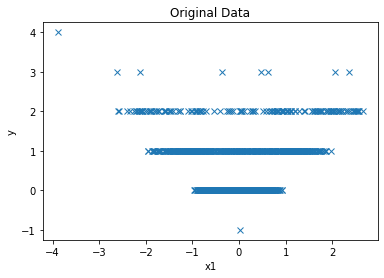

In [12]:
plt.plot(x_train[:,0], y_train,  "x")
plt.title('Original Data')
plt.xlabel('x1')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

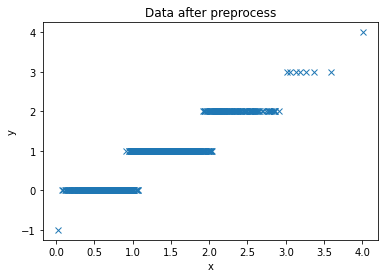

In [13]:
x_trans = preprocessPipe2.fit_transform(x_train, y_train)
plt.plot(x_trans, y_train,  "x")
plt.title('Data after preprocess')
plt.xlabel('x')
plt.ylabel('y')
plt.show

Train mse: 0.88


<function matplotlib.pyplot.show(close=None, block=None)>

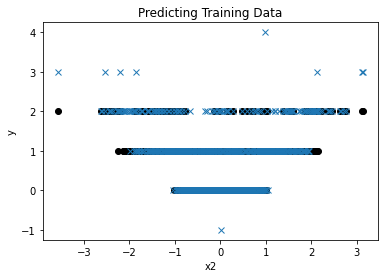

In [14]:
linRegPipe2.fit(x_trans, y_train)   #perform linear Fit
target_predicted = linRegPipe2.predict(x_trans)
mse = linRegPipe2.score(x_trans, y_train)
print("Train mse: " + str(mse))
plt.plot(x_train[:,1], y_train,  "x")
plt.scatter(x_train[:,1], target_predicted,color='k')
plt.title('Predicting Training Data')
plt.xlabel('x2')
plt.ylabel('y')
plt.show

Test mse: 0.879


<function matplotlib.pyplot.show(close=None, block=None)>

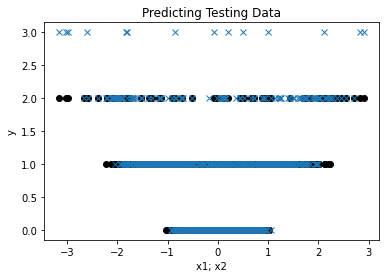

In [15]:
x_test_trans = preprocessPipe2.fit_transform(x_test)
target_predicted = linRegPipe2.predict(x_test_trans)
mse = linRegPipe2.score(x_test_trans, y_test)
print("Test mse: " + str(mse))
plt.plot(x_test[:,1], y_test,  "x")
plt.scatter(x_test[:,1], target_predicted,color='k')
plt.title('Predicting Testing Data')
plt.xlabel('x1; x2')
plt.ylabel('y')
plt.show

In [16]:
mtx = confusion_matrix(y_test, target_predicted)
print("confusion matrix: ")
mtx

confusion matrix: 


array([[369,   3,   0,   0],
       [ 36, 464,   0,   0],
       [  0,  68,  46,   0],
       [  0,   0,  14,   0]], dtype=int64)

The approach is simular to the one in subtask 1. <br>
My observations are, that the classifier is less precise because of the overlapping of data. The confusion matrix describes the correctly in incorrectly classified results. IT expresses, that many of the results are falsely predicted to low.

## Task 2: Estimating Generalization Errors

## Subtask 1: Baseline


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statistics

In [18]:
(X, y) = sklearn.datasets.fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

scaler = MinMaxScaler().fit(X_train)
X_train = (scaler.transform((X_train)))
X_test = (scaler.transform((X_test)))


In [19]:
lr = LinearRegression()
lr.fit(X_train,y_train)

mse = mean_squared_error(y_train, lr.predict(X_train))
print("Linear Features MSE of linear regression train data: " + str(mse))

mse = mean_squared_error(y_test, lr.predict(X_test))
print("Linear Features MSE of linear regression test data: " + str(mse))

Linear Features MSE of linear regression train data: 0.5229818274185227
Linear Features MSE of linear regression test data: 0.5275236518754022


In [20]:
polynomial_regression = make_pipeline(
        PolynomialFeatures(degree=2, include_bias=True),
        LinearRegression(),
    )
polynomial_regression.fit(X_train, y_train)

target_predicted = polynomial_regression.predict(X_train)
mse = mean_squared_error(y_train, target_predicted)
print("MSE polynomial features (n=2) Train Data: " + str(mse))


target_predicted = polynomial_regression.predict(X_test)
mse = mean_squared_error(y_test, target_predicted)
print("MSE polynomial features (n=2) Test Data: " + str(mse))

MSE polynomial features (n=2) Train Data: 0.39774084890170935
MSE polynomial features (n=2) Test Data: 20.79590845467528


Conclusion: the test Data is better to fit with linear regression and linear Features then with polynomial features. 

# Subtask 2: Implement Cross-validation

In [21]:
def carloTrainTestSplit(X, y):
    m = X.shape[0] 
    y = y.reshape(m,1)
    combine = np.append(X, y, axis=1)
    combine = np.take(combine,np.random.permutation(combine.shape[0]),axis=0,out=combine);
    size = (combine.shape[0]) - 1 
    index = round((size * .9))
    X_train = combine[:index, :combine.shape[1] - 1]
    y_train = combine[:index, combine.shape[1] - 1]
    X_test = combine[index:, :combine.shape[1] - 1]
    y_test = combine[index:, combine.shape[1] - 1]
    return X_train, y_train, X_test, y_test


def linearRegressionCombine(X_train, y_train, X_test, y_test, degree):
    polynomial_regression = make_pipeline(
            PolynomialFeatures(degree=degree, include_bias=True),
            LinearRegression(),
        )
    polynomial_regression.fit(X_train, y_train)
    target_predicted = polynomial_regression.predict(X_train)
    mseTrain = mean_squared_error(y_train, target_predicted)
    target_predicted = polynomial_regression.predict(X_test)
    mseTest = mean_squared_error(y_test, target_predicted)
    return[mseTrain, mseTest]


def kFoldTrainTestSplit(X, y,k, degree):
    m = X.shape[0] 
    y = y.reshape(m,1)
    combine = np.append(X, y, axis=1)
    combine = np.take(combine,np.random.permutation(combine.shape[0]),axis=0,out=combine);
    size = (combine.shape[0])
    indexK = round(size /k)
    allMse = []
    for i in range(k):
        combineTest = np.array(combine[i * indexK: (i + 1) * indexK, :])
        combineTrain= np.delete(combine, np.s_[i * indexK: (i + 1) * indexK], 0)
        X_train = combineTrain[:, :combine.shape[1] - 1]
        y_train = combineTrain[:, combine.shape[1] - 1]
        X_test = combineTest[:, :combine.shape[1] - 1]
        y_test = combineTest[:, combine.shape[1] - 1]
        allMse.append(linearRegressionCombine(X_train, y_train, X_test, y_test, degree))
    return allMse

def fFoldTotal(k, X, y, degree):
    allMse = (kFoldTrainTestSplit(X, y,k, degree))    

    mseTrainAvg = 0
    mseTestAvg = 0

    for i in range(len(allMse)):
        mseTrainAvg += allMse[i][0] / len(allMse)
        mseTestAvg += allMse[i][1] / len(allMse)
    return[mseTrainAvg,mseTestAvg]

def carlo(reps, X, y, degree):
    mse_train = []
    mse_test = []
    for i in range(reps):
        X_train, y_train, X_test, y_test = carloTrainTestSplit(X, y)
        polynomial_regression = make_pipeline(
                PolynomialFeatures(degree=degree, include_bias=True),
                LinearRegression(),
            )
        polynomial_regression.fit(X_train, y_train)
        target_predicted = polynomial_regression.predict(X_train)
        mse = mean_squared_error(y_train, target_predicted)
        mse_train.append(mse)
        target_predicted = polynomial_regression.predict(X_test)
        mse = mean_squared_error(y_test, target_predicted)
        mse_test.append(mse)
    mseTrainAvg = np.sum(mse_train)/reps
    mseTestAvg = np.sum(mse_test)/reps
    return [mseTrainAvg, mseTestAvg]

In [22]:
print("implemented k-fold cross-validation with k = 10 linear features")
k = 10        
mse_train, mse_test = fFoldTotal(k, X_train, y_train, 1)
print("Avg MSE for k-Fold Training Data: " + str(mse_train))
print("Avg MSE for k-Fold Testing Data: " + str(mse_test))


implemented k-fold cross-validation with k = 10 linear features
Avg MSE for k-Fold Training Data: 0.5182470146050631
Avg MSE for k-Fold Testing Data: 3.162654274322952


In [23]:
print("implemented Monte Carlo cross-validation with 90% split for 10 reps with linear features")
reps = 10
mse_train, mse_test = carlo(reps, X_train, y_train, 1)
print("MSE polynomial features Monte Carlo Cross-validation Train Data: " + str(mse_train))
print("MSE polynomial features Monte Carlo Cross-validation Test Data: " + str(mse_test))

implemented Monte Carlo cross-validation with 90% split for 10 reps with linear features
MSE polynomial features Monte Carlo Cross-validation Train Data: 0.5236463507206335
MSE polynomial features Monte Carlo Cross-validation Test Data: 0.5193221607295564


How does this compare to the MSE on the test set from the previous subtask? <br>
Both validation methods calculate a simular MSE for the Training data set. The test MSE however is not accurate for both validation Methos. That is caused by the small Dataset.

In [24]:
print("Run Monte Carlos cross-validation for 20 times with linear features (each time sampling different training and test data)")

mse_train_all = []
mse_test_all = []
for i in range(20):
    mse_train, mse_test =  carlo(10, X_train, y_train, 1)
    mse_train_all.append(mse_train)
    mse_test_all.append(mse_test)
    
print("MSE Training Data avg: " + str(np.sum(mse_train_all)/len(mse_train_all)))
print("MSE Training Data variance: " + str(statistics.variance(mse_train_all)))
print("MSE Testing Data avg: " + str(np.sum(mse_test_all)/len(mse_test_all)))
print("MSE Testing Data variance: " + str(statistics.variance(mse_test_all)))



Run Monte Carlos cross-validation for 20 times with linear features (each time sampling different training and test data)
MSE Training Data avg: 0.5183768349071484
MSE Training Data variance: 2.6419254817972494e-05
MSE Testing Data avg: 3.028873676677589
MSE Testing Data variance: 6.9145332939571515


In [25]:
#res = statistics.variance(test_list)

print("Run k-fold cross-validation with k = 10 for 20 times (each time using a different permutation of the data on which the folds are based).")
mse_train_all = []
mse_test_all = []
for i in range(20):
    mse_train, mse_test =  fFoldTotal(10, X_train, y_train, 1)
    mse_train_all.append(mse_train)
    mse_test_all.append(mse_test)
    
print("MSE Training Data avg: " + str(np.sum(mse_train_all)/len(mse_train_all)))
print("MSE Training Data variance: " + str(statistics.variance(mse_train_all)))
print("MSE Testing Data avg: " + str(np.sum(mse_test_all)/len(mse_test_all)))
print("MSE Testing Data variance: " + str(statistics.variance(mse_test_all)))


Run k-fold cross-validation with k = 10 for 20 times (each time using a different permutation of the data on which the folds are based).
MSE Training Data avg: 0.5183758451996918
MSE Training Data variance: 7.150387725017233e-08
MSE Testing Data avg: 3.0615483330617375
MSE Testing Data variance: 0.06946766054062414


In [26]:
#res = statistics.variance(test_list)

print("Run k-fold cross-validation with k = 20 for 20 times (each time using a different permutation of the data on which the folds are based).")
mse_train_all = []
mse_test_all = []
for i in range(20):
    mse_train, mse_test =  fFoldTotal(20, X_train, y_train, 1)
    mse_train_all.append(mse_train)
    mse_test_all.append(mse_test)
    
print("MSE Training Data avg: " + str(np.sum(mse_train_all)/len(mse_train_all)))
print("MSE Training Data variance: " + str(statistics.variance(mse_train_all)))
print("MSE Testing Data avg: " + str(np.sum(mse_test_all)/len(mse_test_all)))
print("MSE Testing Data variance: " + str(statistics.variance(mse_test_all)))


Run k-fold cross-validation with k = 20 for 20 times (each time using a different permutation of the data on which the folds are based).
MSE Training Data avg: 0.5207252715413985
MSE Training Data variance: 1.433552274325981e-09
MSE Testing Data avg: 2.960155844559135
MSE Testing Data variance: 0.005147149573086926


With more repetitions, the Variance of the test MSE is decreasing. The Train MSE stays the same.

# Subtask 3: Model Selection

In [27]:
def linearRegressionCombineTrainTest(X_train, y_train, X_test, y_test, degree):
    polynomial_regression = make_pipeline(
            PolynomialFeatures(degree=degree, include_bias=True),
            LinearRegression(),
        )
    polynomial_regression.fit(X_train, y_train)
    target_predicted = polynomial_regression.predict(X_test)
    mseTest = mean_squared_error(y_test, target_predicted)
    #print("MSE polynomial features Test Data: " + str(mseTest))  
    return[ mseTest]



def linearRegressionCombine2(X_train, y_train, degree):
    polynomial_regression = make_pipeline(
            PolynomialFeatures(degree=degree, include_bias=True),
            LinearRegression(),
        )
    polynomial_regression.fit(X_train, y_train)
    target_predicted = polynomial_regression.predict(X_train)
    mseTrain = mean_squared_error(y_train, target_predicted)
    print("MSE polynomial features with degree: "+ str(degree) + " Train Data: " + str(mseTrain))
    return[mseTrain]

Select the best degree with respect to the MSE on the training data  only:

MSE polynomial features with degree: 1 Train Data: 0.5229818274185227
MSE polynomial features with degree: 2 Train Data: 0.39774084890170935
MSE polynomial features with degree: 3 Train Data: 0.3280566717687912
MSE polynomial features with degree: 4 Train Data: 0.2558450242701453
MSE polynomial features with degree: 5 Train Data: 0.1878350992348556
The best Degree ist 5


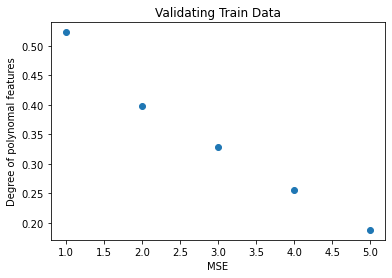

In [28]:
reps = 5
res = []
index = []
for i in range(reps):
    res.append(  linearRegressionCombine2(X_train, y_train , i + 1))
    index.append(i+1)

plt.scatter(index, res)
plt.title('Validating Train Data')
plt.xlabel('MSE')
plt.ylabel('Degree of polynomal features')
print("The best Degree ist 5")

Split the training data into new training data (50% of the data, chosen randomly) and validation data (the remaining 50% of the data). Train linear regression models
on the new (smaller) training set and pick the best degree with respect to the MSE
on the validation data:

MSE polynomial features with degree: 1 Test Data: [3.9306001926604277]
MSE polynomial features with degree: 2 Test Data: [10949.738121441735]
MSE polynomial features with degree: 3 Test Data: [399076194.43794537]
MSE polynomial features with degree: 4 Test Data: [1794061319372.549]
MSE polynomial features with degree: 5 Test Data: [1.2842825897767232e+18]
The best Degree is 1


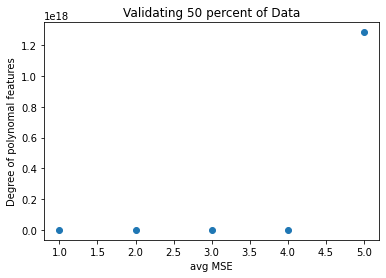

In [29]:
X_train50, X_test50, y_train50, y_test50 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

reps = 5
res = []
index = []
for i in range(reps):
    temp = linearRegressionCombineTrainTest(X_train50, y_train50, X_test50, y_test50, i+1)
    res.append(  temp)
    print("MSE polynomial features with degree: "+ str(i+1) + " Test Data: " + str(temp))
    index.append(i+1)
plt.scatter(index, res)
plt.title('Validating 50 percent of Data')
plt.xlabel('avg MSE')
plt.ylabel('Degree of polynomal features')
print("The best Degree is 1")

Use 10-fold cross-validation for estimating the MSE of least squares linear regression
models for dierent degrees of polynomial features.

MSE polynomial features with degree: 1 and 10 k-Fold Test Data: 4.973117384387072
MSE polynomial features with degree: 2 and 10 k-Fold Test Data: 25836.316900101596
MSE polynomial features with degree: 3 and 10 k-Fold Test Data: 246656282.71560654
MSE polynomial features with degree: 4 and 10 k-Fold Test Data: 12874056943961.936
MSE polynomial features with degree: 5 and 10 k-Fold Test Data: 68794846773741.56
The best Degree ist 1


Text(0, 0.5, 'Degree of polynomal features')

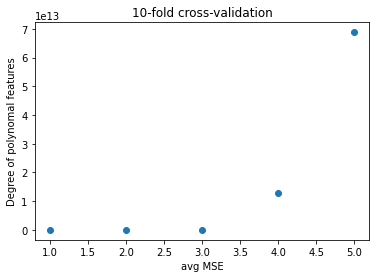

In [30]:
from sklearn.model_selection import KFold


degree = 5
res = []
index = []
for i in range(degree):
    n_splits=10
    kf = KFold(n_splits)
    kf.get_n_splits(X_train)
    singeRes = 0
    for train_index, test_index in kf.split(X_train):
        X_trainLoop, X_testLoop = X[train_index], X[test_index]
        y_trainLoop, y_testLoop = y[train_index], y[test_index]
        singeRes += linearRegressionCombineTrainTest(X_trainLoop, y_trainLoop, X_testLoop, y_testLoop, i+1)[0]
    index.append(i+1)
    res.append(singeRes/n_splits)
    
    print("MSE polynomial features with degree: "+ str(i+1) + " and 10 k-Fold Test Data: " + str(singeRes/n_splits))

print("The best Degree ist 1")
plt.scatter(index, res)
plt.title('10-fold cross-validation')
plt.xlabel('avg MSE')
plt.ylabel('Degree of polynomal features')   



Use 20-fold cross-validation for estimating the MSE of least squares linear regression
models for diferent degrees of polynomial features.

MSE polynomial features with degree: 1 and 20 k-Fold Test Data: 5.058017983436088
MSE polynomial features with degree: 2 and 20 k-Fold Test Data: 25171.663284691735
MSE polynomial features with degree: 3 and 20 k-Fold Test Data: 346110073.06452376
MSE polynomial features with degree: 4 and 20 k-Fold Test Data: 11143727232267.756
MSE polynomial features with degree: 5 and 20 k-Fold Test Data: 64376909271787.02
The best Degree ist 1


Text(0, 0.5, 'Degree of polynomal features')

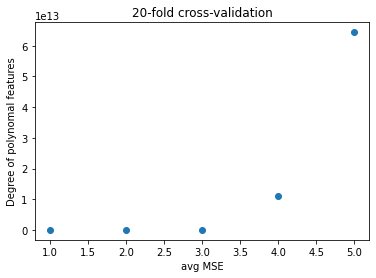

In [31]:
degree = 5
res = []
index = []
for i in range(degree):
    n_splits=20
    kf = KFold(n_splits)
    kf.get_n_splits(X_train)
    singeRes = 0
    for train_index, test_index in kf.split(X_train):
        X_trainLoop, X_testLoop = X[train_index], X[test_index]
        y_trainLoop, y_testLoop = y[train_index], y[test_index]
        singeRes += linearRegressionCombineTrainTest(X_trainLoop, y_trainLoop, X_testLoop, y_testLoop, i+1)[0]
    index.append(i+1)
    res.append(singeRes/n_splits)
    
    print("MSE polynomial features with degree: "+ str(i+1) + " and 20 k-Fold Test Data: " + str(singeRes/n_splits))
 
    
  
print("The best Degree ist 1")
plt.scatter(index, res)
plt.title('20-fold cross-validation')
plt.xlabel('avg MSE')
plt.ylabel('Degree of polynomal features')  


My results show that the best degree is 1. Every experiment but The first proves that. The first experiment determents degree 5 to be the best, but that experiment does not verify with test data. For that reason, it is designed to overfit and is not recommended by me. I would recommend the 10-fold cross-validation because it is accurate enough to evaluate the mse of the different models and the runtime is not too long.